In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv(r'\comments_data.csv')
data.head(10)

,author,created,created_utc,body,score,subreddit,subreddit_id,link_id,id
0,u/littlemsshiny,2025-01-01 02:00:00,1.735690e+09,There is so much administrative bs you have to...,0.051050,AskReddit,t5_2qh1i,t3_1hql89c,m4rvw9q
1,u/CarolEnchanting85,2025-01-01 02:00:00,1.735690e+09,"The Night Of, hauntingly good.",0.049918,AskReddit,t5_2qh1i,t3_1hqea5p,m4rvxrq
2,u/taylo649,2025-01-01 02:00:00,1.735690e+09,My dad’s a doctor so he wasn’t repulsed or dis...,0.049779,AskReddit,t5_2qh1i,t3_1hqf70t,m4rvxpt
3,u/HzeGry,2025-01-01 02:00:00,1.735690e+09,Purchased mine on my birthday the year I was e...,0.049569,AskReddit,t5_2qh1i,t3_1hqprcx,m4rvxp7
4,u/RiskDisasterGuy,2025-01-01 02:00:00,1.735690e+09,When I was in my early/mid 20s there would be ...,0.049513,AskReddit,t5_2qh1i,t3_1hqbbsy,m4rvxkr
5,u/GlamorousAngelEloise,2025-01-01 02:00:00,1.735690e+09,Carnivàle,0.049527,AskReddit,t5_2qh1i,t3_1hqea5p,m4rvxkk
6,u/13curseyoukhan,2025-01-01 02:00:00,1.735690e+09,"Nobody said no squeeling, ooohing or ahhhing. ...",0.050072,AskReddit,t5_2qh1i,t3_1hqng7w,m4rvxgk
7,u/Sadly_NotAPlatypus,2025-01-01 02:00:00,1.735690e+09,For the ability to buy groceries? Yes.,0.049513,AskReddit,t5_2qh1i,t3_1hqprcx,m4rvxf7
8,u/davesoverhere,2025-01-01 02:00:00,1.735690e+09,There was some high school football movie film...,0.049834,AskReddit,t5_2qh1i,t3_1hqpad5,m4rvx9s
9,u/TaylorDurdan,2025-01-01 02:00:00,1.735690e+09,Snow bird.,0.049513,AskReddit,t5_2qh1i,t3_1hqjolt,m4rvx23


In [3]:
print('Number of rows before dropping NaNs and deleted comments and July 2025')
len(data)

Number of rows before dropping NaNs and deleted comments and July 2025


33783542

In [4]:
data = data[~data['body'].isin(['[removed]', '[deleted]'])]
data = data.dropna(subset=['body'])
data['created'] = pd.to_datetime(data['created'])
data = data[data['created'].dt.month != 7]

print('\nNumber of rows after')

len(data)


Number of rows after


31338836

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31338836 entries, 0 to 33754107
Data columns (total 9 columns):
 #   Column        Dtype         
---  ------        -----         
 0   author        object        
 1   created       datetime64[ns]
 2   created_utc   float64       
 3   body          object        
 4   score         float64       
 5   subreddit     object        
 6   subreddit_id  object        
 7   link_id       object        
 8   id            object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 2.3+ GB


In [6]:
print('Top 5 most active subreddits')
data['subreddit'].value_counts().sort_values(ascending=False).head(5)

Top 5 most active subreddits


subreddit
AskReddit                20006062
politics                  5858405
changemyview              1549049
Askpolitics                699479
UkraineWarVideoReport      596560
Name: count, dtype: int64

In [8]:
import re
keywords = ['trump', 'djt', 'maga', 'president of the united states', 'us president', 'president of the us', 'president of us']
pattern = r'\b(' + '|'.join(re.escape(word) for word in keywords) + r')\b'
data_filtered = data[data['body'].str.contains(pattern, case=False, regex=True)].copy()
data_filtered['hour'] = data_filtered['created'].dt.hour

C:\Users\Nataliia\AppData\Local\Temp\ipykernel_16764\1999956323.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_filtered = data[data['body'].str.contains(pattern, case=False, regex=True)].copy()


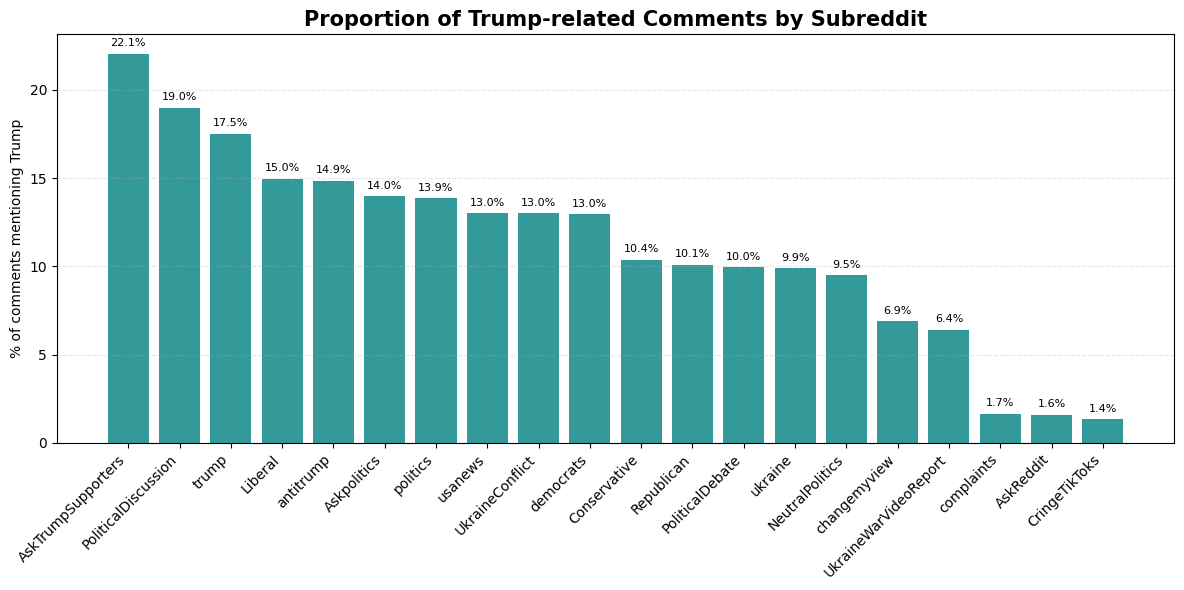

In [9]:
sub_counts = data['subreddit'].value_counts()
filtered_counts = data_filtered['subreddit'].value_counts()
filtered_counts = filtered_counts.reindex(sub_counts.index).fillna(0)

ratios = (filtered_counts / sub_counts).fillna(0)
ratios_sorted = ratios.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(ratios_sorted.index, ratios_sorted.values * 100, color='teal', alpha=0.8)

for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.3,
                 f"{height:.1f}%", ha='center', va='bottom', fontsize=8)

plt.title('Proportion of Trump-related Comments by Subreddit', fontsize=15, weight='bold')
plt.ylabel('% of comments mentioning Trump')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

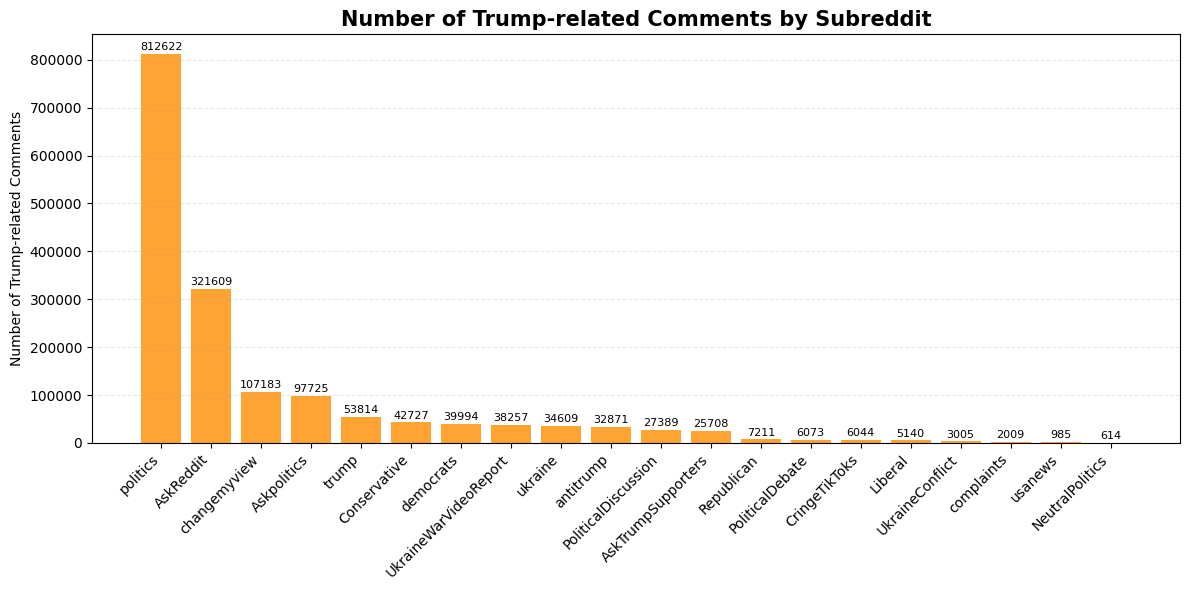

In [10]:
sub_counts = data['subreddit'].value_counts()
filtered_counts = data_filtered['subreddit'].value_counts().fillna(0)

filtered_counts_sorted = filtered_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(filtered_counts_sorted.index, filtered_counts_sorted.values, color='darkorange', alpha=0.8)

for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, height + max(filtered_counts_sorted.values) * 0.005,
                 f"{int(height)}", ha='center', va='bottom', fontsize=8)

plt.title('Number of Trump-related Comments by Subreddit', fontsize=15, weight='bold')
plt.ylabel('Number of Trump-related Comments')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

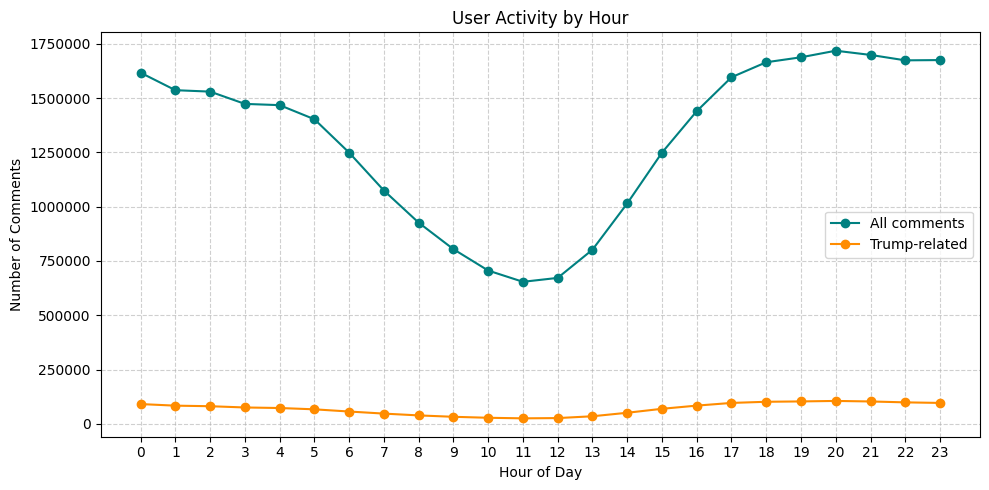

In [11]:
data['hour'] = data['created'].dt.hour
data_filtered['hour'] = data_filtered['created'].dt.hour

hourly_counts = data['hour'].value_counts().sort_index()
hourly_filtered_counts = data_filtered['hour'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', label='All comments', color='teal')
plt.plot(hourly_filtered_counts.index, hourly_filtered_counts.values, marker='o', label='Trump-related', color='darkorange')

plt.title('User Activity by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Comments')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(0, 24))
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.tight_layout()
plt.show()

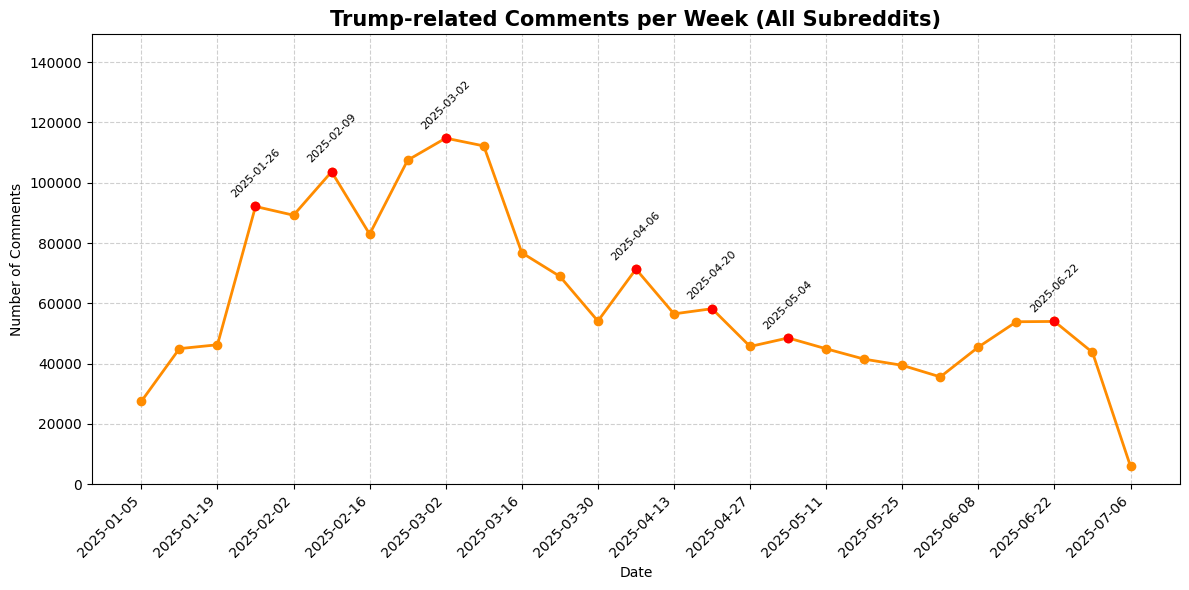

In [12]:
data_filtered['created'] = pd.to_datetime(data_filtered['created'])
weekly_counts = data_filtered.resample('W', on='created').size()

plt.figure(figsize=(12, 6))
plt.plot(weekly_counts.index, weekly_counts.values, marker='o', color='darkorange', linewidth=2)

y = weekly_counts.values
spike_indices = np.where((y[1:-1] > y[:-2]) & (y[1:-1] > y[2:]))[0] + 1
spike_dates = weekly_counts.index[spike_indices]
spike_values = weekly_counts.values[spike_indices]

plt.scatter(spike_dates, spike_values, color='red', zorder=5)

for x, y_val in zip(spike_dates, spike_values):
    plt.text(x, y_val + max(weekly_counts.values) * 0.02,
             x.strftime('%Y-%m-%d'),
             ha='center', va='bottom', fontsize=8, rotation=45)

plt.ylim(0, weekly_counts.max() * 1.3)

plt.title('Trump-related Comments per Week (All Subreddits)', fontsize=15, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(weekly_counts.index[::2], weekly_counts.index.strftime('%Y-%m-%d')[::2], rotation=45, ha='right')
plt.tight_layout()
plt.show()

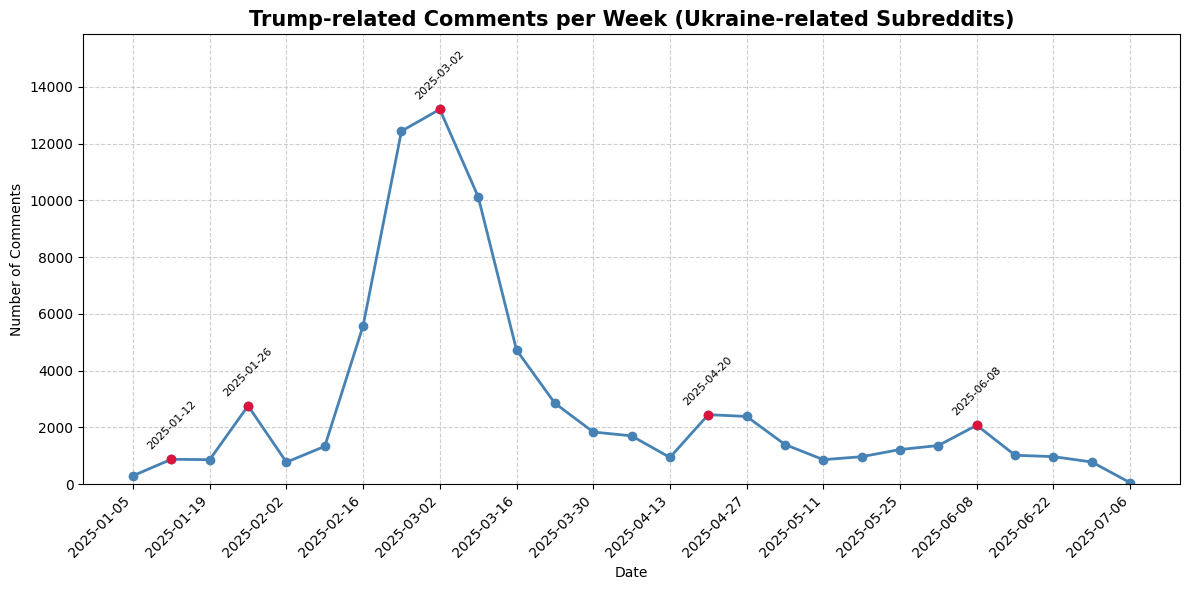

In [13]:
subs = ['ukraine', 'UkraineWarVideoReport', 'UkraineConflict']
subset = data_filtered[data_filtered['subreddit'].isin(subs)].copy()

subset['created'] = pd.to_datetime(subset['created'])
weekly_counts = subset.resample('W', on='created').size()

plt.figure(figsize=(12, 6))
plt.plot(weekly_counts.index, weekly_counts.values, marker='o', color='steelblue', linewidth=2)

y = weekly_counts.values
spike_indices = np.where((y[1:-1] > y[:-2]) & (y[1:-1] > y[2:]))[0] + 1
spike_dates = weekly_counts.index[spike_indices]
spike_values = weekly_counts.values[spike_indices]

plt.scatter(spike_dates, spike_values, color='crimson', zorder=5)

for x, y_val in zip(spike_dates, spike_values):
    plt.text(x, y_val + max(weekly_counts.values) * 0.02,
             x.strftime('%Y-%m-%d'),
             ha='center', va='bottom', fontsize=8, rotation=45)

plt.ylim(0, weekly_counts.max() * 1.2)

plt.title('Trump-related Comments per Week (Ukraine-related Subreddits)', fontsize=15, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(weekly_counts.index[::2], weekly_counts.index.strftime('%Y-%m-%d')[::2], rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Ideas for further analysis

##### Text analysis:
Frequency of words in comments related to Donald Trump.
Analyze the most frequently used words in the corpus of comments mentioning Trump to outline the general context and tone of the discussions.

Most common bigrams.
Identify the most frequently used word combinations that may reflect key narratives, political slogans, or idioms characteristic of different communities.

Contextual analysis of words closest to mentions of Trump.
Investigate which words most often appear directly next to key phrases (“Trump,” “MAGA,” “President of the US,” etc.). This will illustrate the semantic context in which Trump is mentioned — positive, neutral, or negative.

##### Sentiment analysis:
General trend of sentiment change over time.
Build a time series of average sentiment to illustrate the general mood of discussions about Trump's policies during the study period (overall average trend, comparison between Ukrainian and American communities, comparison between communities with different political orientations and positions).
Compare peak points or sharp changes in sentiment with actual political events related to Trump's activities.

Comparison of average sentiment across subreddits (some communities will obviously be more favorable and others less so) and the variability of opinions within a single subreddit (how homogeneous or polarized the community's opinions are).

Changes in sentiment around words related to the war in Ukraine and Ukrainians in the context of Trump's policies in American subreddits.
Understanding how American communities perceive the Ukrainian context in political discourse related to Trump.